# EDA beta concatenated

First we do some cleaning of the dataset because there are some unused and alpha-chain specific columns.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import wandb
import os

In [43]:
'''
# -----------------------------------------------------------------------------
# W&B Setup
# -----------------------------------------------------------------------------
PROJECT_NAME = "BA_Project_ZHAW"
print(f"PROJECT_NAME: {PROJECT_NAME}")
run = wandb.init(project=PROJECT_NAME, job_type=f"download dataset", entity="ba-zhaw")
config = wandb.config


# Download corresponding artifact (= dataset) from W&B
precision = "allele" # gene or allele
levenshtein_data_path = f"../../data/EDA/beta/"
download_path = "../../data/WnB_Download/beta"
output_path = f'../../data/EDA/beta/'
output_file_name = f'beta_{precision}_levenshtein.tsv'
dataset_name = f"beta_{precision}"
artifact = run.use_artifact(f"{dataset_name}:latest")
data_dir = artifact.download(download_path)

run.finish()
'''

'\n# -----------------------------------------------------------------------------\n# W&B Setup\n# -----------------------------------------------------------------------------\nPROJECT_NAME = "BA_Project_ZHAW"\nprint(f"PROJECT_NAME: {PROJECT_NAME}")\nrun = wandb.init(project=PROJECT_NAME, job_type=f"download dataset", entity="ba-zhaw")\nconfig = wandb.config\n\n\n# Download corresponding artifact (= dataset) from W&B\nprecision = "allele" # gene or allele\nlevenshtein_data_path = f"../../data/EDA/beta/"\ndownload_path = "../../data/WnB_Download/beta"\noutput_path = f\'../../data/EDA/beta/\'\noutput_file_name = f\'beta_{precision}_levenshtein.tsv\'\ndataset_name = f"beta_{precision}"\nartifact = run.use_artifact(f"{dataset_name}:latest")\ndata_dir = artifact.download(download_path)\n\nrun.finish()\n'

In [44]:
precision = 'gene'
data_dir = '../../data/WnB_Download/beta'
levenshtein_data_path = '../../data/EDA/beta'
positive_only_data_path = f'../../data/EDA/beta/beta_{precision}_positive_only.tsv'

train_file_path = f"{data_dir}/{precision}/train.tsv"
test_file_path = f"{data_dir}/{precision}/test.tsv"
val_file_path = f"{data_dir}/{precision}/validation.tsv"

df_train = pd.read_csv(train_file_path, sep="\t")
df_test = pd.read_csv(test_file_path, sep="\t")
df_test.drop(["Unnamed: 0"], axis=1, inplace=True, errors='ignore')
df_validation = pd.read_csv(val_file_path, sep="\t")
df_seen = pd.concat([df_train, df_validation])
df_levenshtein = pd.read_csv(f"{levenshtein_data_path}/beta_{precision}_levenshtein.tsv", sep="\t") #  remove if levenshtein data isn't available
df = pd.read_csv(positive_only_data_path, sep="\t")

In [45]:

output_filename = f"../../data/EDA/beta/ydata_profiling_{precision}.html"
#df = pd.concat([df_train, df_test, df_validation])
df = df.drop(columns=["TCR_name", "TRAV", "TRAJ", "TRA_CDR3", "TRAC", "TRBC", "TRA_CDR3"], errors='ignore') # not interesting for analyze of beta chain
print(f"the whole dataset has {len(df)} entries and the following columns are considered for this notebook:")
df.head()

the whole dataset has 179822 entries and the following columns are considered for this notebook:


,TRBV,TRBJ,TRB_CDR3,Epitope,MHC,Binding,task
0,TRBV4-1,TRBJ2-1,CASSQETGSYEQFF,RPPIFIRRL,HLA-B,1,NaN
1,TRBV5-1,TRBJ1-3,CASSLDSQSSGNTIYF,RAKFKQLL,HLA-B,1,NaN
2,TRBV6-1,TRBJ1-6,CASSEWVFWSSYNSPLHF,VYALIAGATL,HLA-A,1,NaN
3,TRBV16,TRBJ2-1,CASSQSGVGNEQFF,KLGGALQAK,HLA-A,1,NaN
4,TRBV5-1,TRBJ1-4,CASSGTGTSAFATNEKLFF,KLGGALQAK,HLA-A,1,NaN


In [46]:
#df[df['Binding'] == 1].to_csv(f"{output_path}/beta_{precision}_positive_only.tsv", sep='\t', index=False)
#df_positive = df[df['Binding'] == 1]

## Pandas Profiling
pandas-profiling package naming was changed. To continue profiling data use ydata-profiling instead!
-> That's why we use ydata-profiling

In [47]:
#from ydata_profiling import ProfileReport
#profile = ProfileReport(df, title="Profiling Report")

In [48]:
#profile.to_widgets()
#profile.to_file(output_filename)

In [49]:
#profile = ProfileReport(df_levenshtein, title=f"Report paired levenshtein {precision}")
#levenshtein_data_path = f"/home/ubuntu/BA_ZHAW/data/EDA/beta/"
#profile.to_file(f"{levenshtein_data_path}/profiling_{precision}_levenshtein.tsv")

## Tasks

In [50]:
print("Each entry has a minimum levenshtein to the seen data. From this values, we take the mean.")

df_levenshtein_TPP2 = df_levenshtein[df_levenshtein["task"] == "TPP2"]
print(f"mean levenshtein distance of TRB TPP2: {df_levenshtein_TPP2['min_levenshtein_cdr_to_seen'].mean()}")
print(f"mean levenshtein distance of Epitope TPP2: {df_levenshtein_TPP2['min_levenshtein_epitope_to_seen'].mean()}")

df_levenshtein_TPP3 = df_levenshtein[df_levenshtein["task"] == "TPP3"]
print(f"mean levenshtein distance of TRB TPP3: {df_levenshtein_TPP3['min_levenshtein_cdr_to_seen'].mean()}")
print(f"mean levenshtein distance of Epitope TPP3: {df_levenshtein_TPP3['min_levenshtein_epitope_to_seen'].mean()}")

Each entry has a minimum levenshtein to the seen data. From this values, we take the mean.
mean levenshtein distance of TRB TPP2: 1.9480847684031914
mean levenshtein distance of Epitope TPP2: 0.0
mean levenshtein distance of TRB TPP3: 1.9130434782608696
mean levenshtein distance of Epitope TPP3: 4.482837528604119


## Epitopes

In [51]:
unique_epitope_count = df["Epitope"].value_counts().count()
epitope_count = df["Epitope"].notnull().sum()
print(f"there are {epitope_count} epitopes and {unique_epitope_count} distinct epitopes")

there are 179822 epitopes and 1890 distinct epitopes


In [52]:
print(len(df["Epitope"].drop_duplicates(keep=False)))

678


In [53]:
print(len(df_test[df_test['task'] == 'TPP3']))

437


Now a visualisation of how the epitopes are distributed.

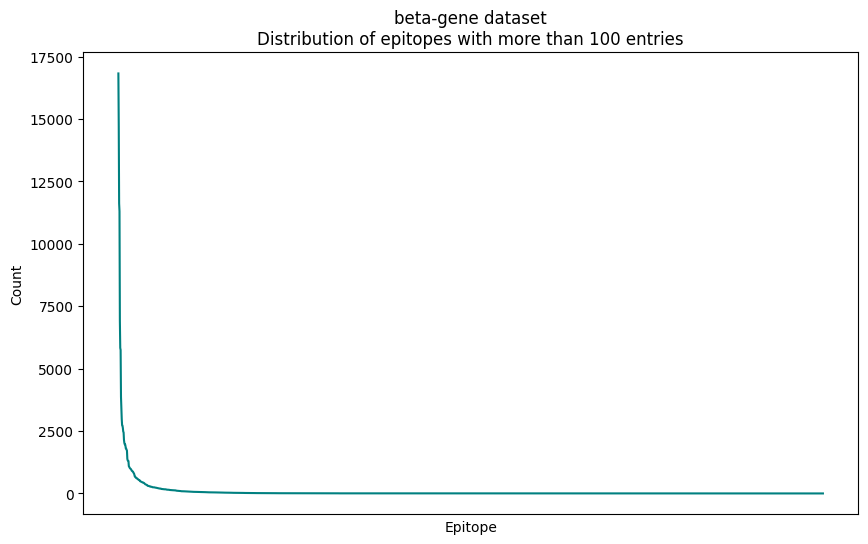

In [54]:
# Count the occurrences of each Epitope
epitope_counts = df['Epitope'].value_counts()

# Filter Epitopes that have more than 2 entries
filtered_epitope_counts = epitope_counts#[epitope_counts > 100]

# Plotting
plt.figure(figsize=(10, 6))
filtered_epitope_counts.plot(kind='line', color='teal')
plt.xlabel('Epitope')
plt.ylabel('Count')
plt.title(f'beta-{precision} dataset\nDistribution of epitopes with more than 100 entries')
plt.xticks([])
plt.show()

## CDR-3 Regions (beta)

In [55]:
unique_cdr_count = df["TRB_CDR3"].value_counts().count()
print(f"there are {unique_cdr_count} unique CDR-3 beta regions")

there are 152160 unique CDR-3 beta regions


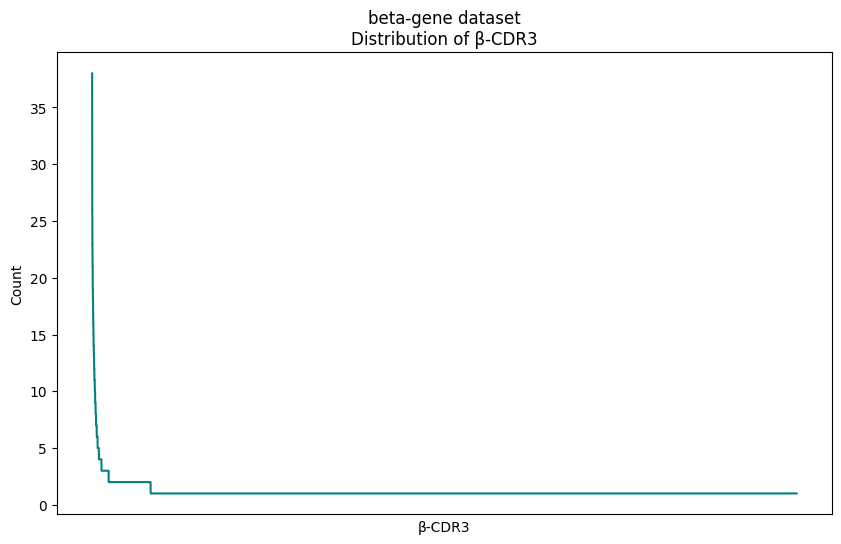

In [56]:
# Count the occurrences of each CDr3
cdr_counts = df['TRB_CDR3'].value_counts()

# Filter Epitopes that have more than 2 entries
filtered_cdr_counts = cdr_counts#[cdr_counts > 20]#.reset_index()

# Plotting
plt.figure(figsize=(10, 6))
filtered_cdr_counts.plot(kind='line', color='teal')
plt.xlabel('β-CDR3')
plt.ylabel('Count')
plt.title(f'beta-{precision} dataset\nDistribution of β-CDR3')
plt.xticks([])
plt.show()

In [57]:
import seaborn as sns
sns.set_theme(style="darkgrid")

sns.displot(
    df, x="TRB_CDR3", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

ValueError: Could not interpret value `sex` for `row`. An entry with this name does not appear in `data`.

Distribution of TRB_CDR3 Sequence Lengths

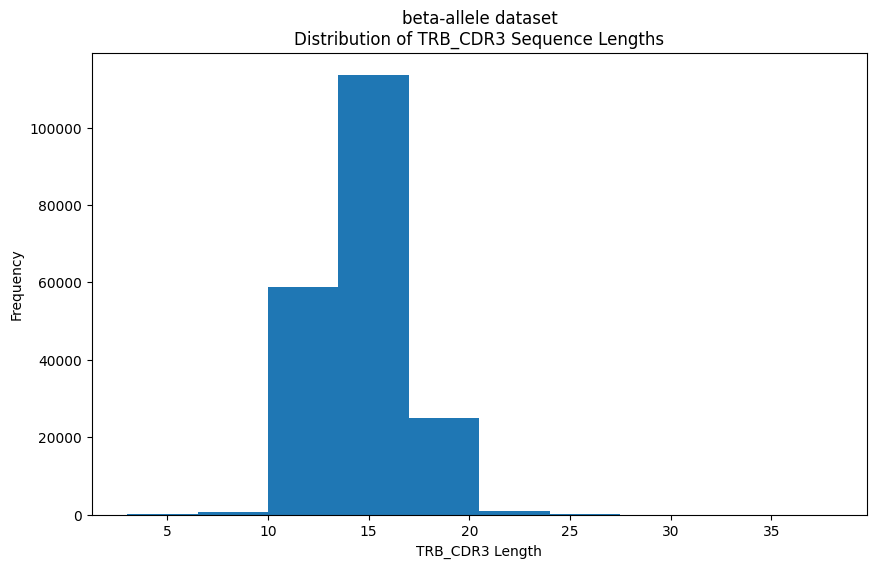

In [ ]:
# Calculate TRB_CDR3 sequence lengths
df['TRB_CDR3_Length'] = df['TRB_CDR3'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df['TRB_CDR3_Length'])
plt.title(f'beta-{precision} dataset\nDistribution of TRB_CDR3 Sequence Lengths')
plt.xlabel('TRB_CDR3 Length')
plt.ylabel('Frequency')
plt.show()

## V and J region (beta)

How many entries do have V **and** J region

In [ ]:
paired_VJ_count = df[["TRBV", "TRBJ"]].notnull().all(axis=1).sum()
print(f"There are {paired_VJ_count} entries which have the V and J region")

There are 193959 entries which have the V and J region


visual representation of the distribution of V and J regions. 

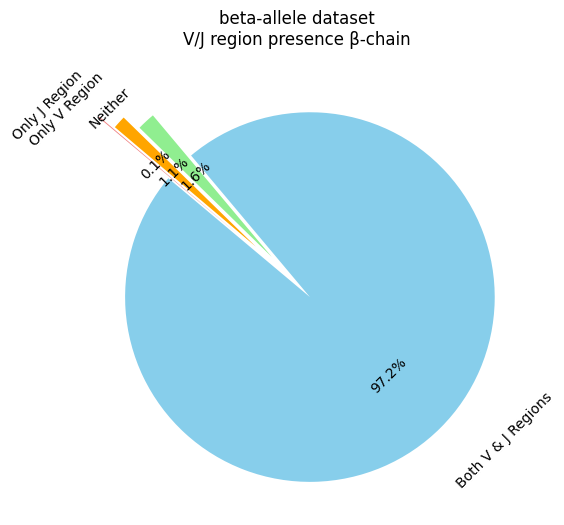

In [ ]:
# Define a function to categorize each entry
def categorize_row(row):
    if pd.notnull(row['TRBV']) and pd.notnull(row['TRBJ']):
        return 'Both V & J Regions'
    elif pd.notnull(row['TRBV']):
        return 'Only V Region'
    elif pd.notnull(row['TRBJ']):
        return 'Only J Region'
    else:
        return 'Neither'

# Apply the function to each row
df['Category'] = df.apply(categorize_row, axis=1)

# Count the number of entries in each category
category_counts = df['Category'].value_counts()
explode = [0.1, 0.2, 0.3, 0.4]  # Different explode values for each slice
# Plotting
plt.figure(figsize=(10, 6))
plt.pie(category_counts, 
        labels=category_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['skyblue', 'lightgreen', 'orange', 'lightcoral'],
        textprops={'rotation': 45}, #'fontsize': 12, 
        #pctdistance=0.85,  # Distance of the percentage text from the center
        #labeldistance=1.1,  # Distance of the labels from the center
        explode=explode
        )
plt.title(f'beta-{precision} dataset\nV/J region presence β-chain')
plt.show()

Exploring how many unique combinations of TRBV and TRBJ genes there are could be informative. This might help in understanding the diversity of T-cell receptor beta chains represented in data.

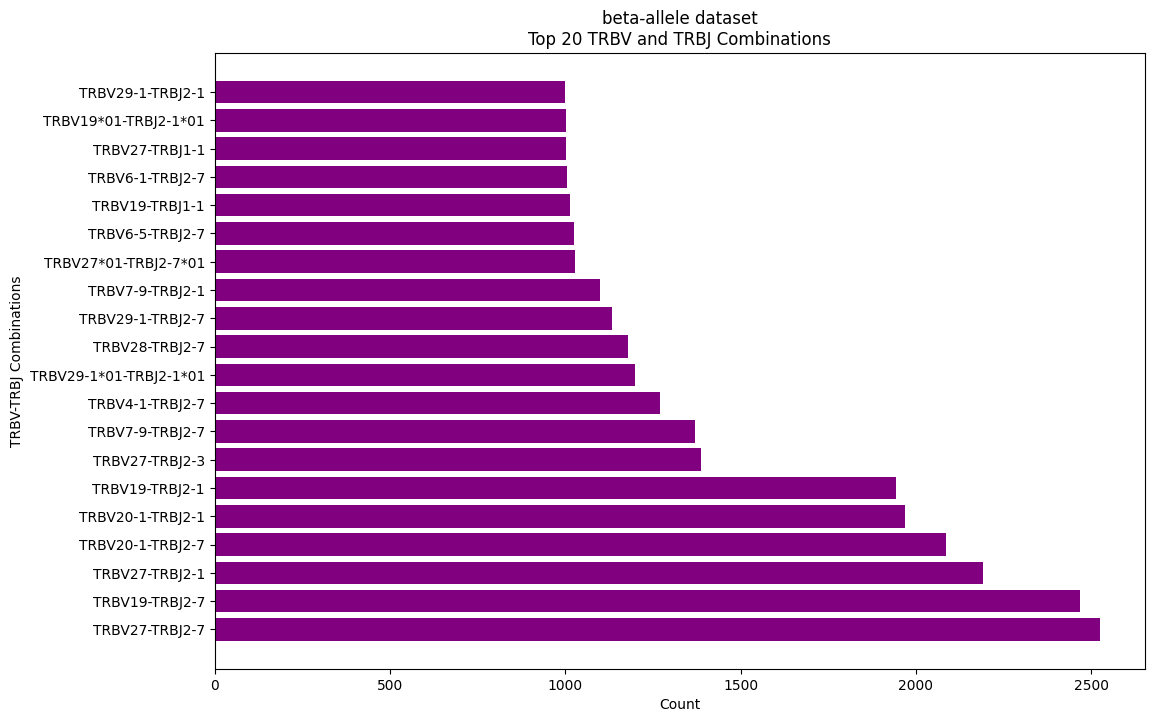

In [ ]:
# Count unique TRBV and TRBJ combinations
unique_combinations = df.groupby(['TRBV', 'TRBJ']).size().reset_index(name='Count')

# Plotting the top 20 most frequent combinations
top_combinations = unique_combinations.sort_values(by='Count', ascending=False).head(20)

plt.figure(figsize=(12, 8))
plt.barh(top_combinations['TRBV'] + '-' + top_combinations['TRBJ'], top_combinations['Count'], color='purple')
plt.xlabel('Count')
plt.ylabel('TRBV-TRBJ Combinations')
plt.title(f'beta-{precision} dataset\nTop 20 TRBV and TRBJ Combinations')
plt.show()

### V Region
How many entries do have a V region and how many different V regions are there

In [ ]:
unique_V_count = df['TRBV'].nunique()
print(f"There are {unique_V_count} unique V regions")

There are 165 unique V regions


In [ ]:
V_count = df["TRBV"].notnull().sum()
print(f"There are {V_count} entries for J region")

There are 196195 entries for J region


### J Region
How many entries do have J region and how many different J regions are there

In [ ]:
unique_J_count = df["TRBJ"].nunique()
print(f"There are {unique_J_count} unique J regions")

There are 31 unique J regions


In [ ]:
J_count = df["TRBJ"].notnull().sum()
print(f"There are {J_count} entries for J region")

There are 194122 entries for J region


## MHC
How many entries do have MHC A **and** MHC B value

In [ ]:
paired_MHC_count = df[["MHC"]].notnull().all(axis=1).sum()
print(f"There are {paired_MHC_count} entries which have the MHC region")

There are 112167 entries which have the MHC region


In [ ]:
unique_MHC_count = df["MHC"].nunique()
print(f"There are {unique_MHC_count} unique MHC values")

There are 111 unique MHC values


In [ ]:
MHC_count = df["MHC"].notnull().sum()
print(f"There are {MHC_count} entries MHC")

There are 112167 entries MHC


Distribution of MHC

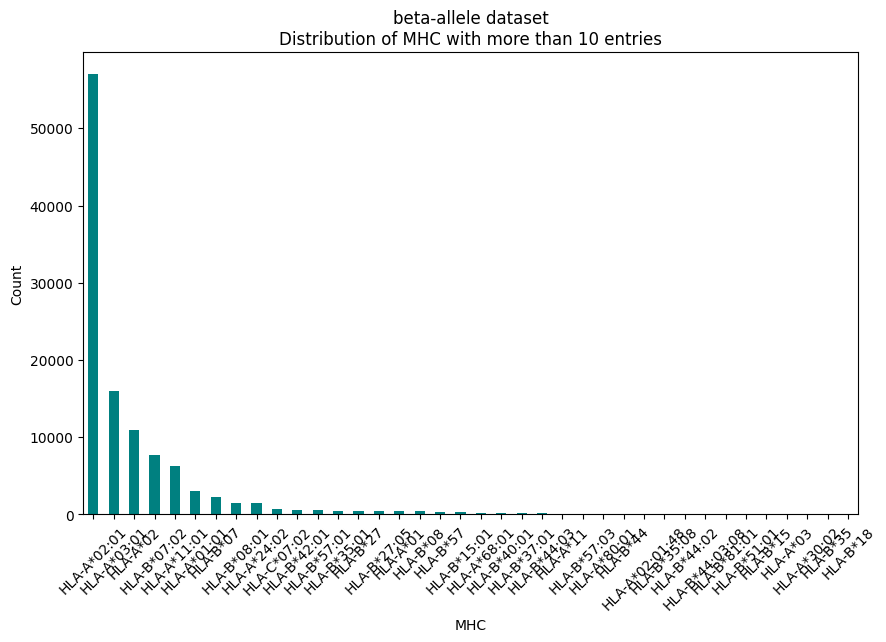

In [ ]:
# Count the occurrences of each MHC
mhc_counts = df['MHC'].value_counts()

# Filter Epitopes that have more than 2 entries
if precision == 'gene':
  filtered_mhc_counts = mhc_counts#[mhc_counts > 10]
else:
  filtered_mhc_counts = mhc_counts[mhc_counts > 10]

# Plotting
plt.figure(figsize=(10, 6))
filtered_mhc_counts.plot(kind='bar', color='teal')
plt.xlabel('MHC')
plt.ylabel('Count')
if precision == 'gene':
  plt.title(f'beta-{precision} dataset\nDistribution of MHC')
else:
  plt.title(f'beta-{precision} dataset\nDistribution of MHC with more than 10 entries')

plt.xticks(rotation=45)
plt.show()